# A quickstart for LMR Turbo (LMRt)

In this quickstart, we will demostrate how to use LMR Turbo (LMRt) to perform LMR analysis.
First, let's import the packages, among which `LMRt` is the LMR Turbo module, and `visual` is the visualizaion module for results plotting.

In [1]:
%load_ext autoreload
%autoreload 2

from slmr import LMRt
from slmr import visual as vs

from pprint import pprint
import os
import numpy as np
import pandas as pd
import pickle
import time

## Initiate a reconstuction job

In [2]:
job = LMRt.ReconJob()

pid=9772 >>> job.cfg created


The job.cfg contains the default settings of the job, and we can print it out to have a check

In [3]:
# pprint(job.cfg, depth=3)

We may also overwrite the default configurations with a yaml file

In [4]:
job.load_cfg('./cfg/cfg_update.yml')
# pprint(job.cfg, depth=3)

pid=9772 >>> job.cfg updated


Or we may just use dot notation to update the specific configurations.
This way is much cleaner as every setting is explicitly listed in this Jupyter notebook.
Therefore, we recommend the users to follow this way.

In [5]:
# let's update the number of ensemble members
job.cfg.core.nens = 100
# pprint(job.cfg, depth=3)

That's it for configuration.
Let's move on to loading prior.

## Load prior

It is easy to load prior in LMRt.
We don't have to maintain a certain directory structure nor certain filenames.
Instead, we just feed the correct file, whereever it is.

In [6]:
filepath='/home/fzhu/SynologyDrive/Dev/Github/LMRv2/input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc'
job.load_prior(filepath, verbose=True, seed=0)

Reading file: /home/fzhu/SynologyDrive/Dev/Github/LMRv2/input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
tas: Global(monthly): mean=6.791441364839557e-07, std-dev=0.8304356932640076
State vector information:
{'tas_sfc_Amon': {'pos': (0, 13823), 'spacecoords': ('lat', 'lon'), 'spacedims': (96, 144), 'vartype': '2D:horizontal'}}
shape of Xb: (13824 x 100)
seed= 0
sampled inds= [864, 394, 776, 911, 430, 41, 265, 988, 523, 497, 414, 940, 802, 849, 310, 488, 366, 597, 913, 929, 223, 516, 142, 288, 143, 773, 97, 633, 818, 256, 931, 545, 722, 829, 616, 923, 150, 317, 101, 747, 75, 920, 870, 700, 338, 483, 573, 103, 362, 444, 323, 625, 655, 934, 209, 565, 984, 453, 886, 533, 266, 63, 824, 561, 14, 95, 736, 860, 408, 727, 844, 803, 684, 640, 1, 626, 505, 847, 888, 341, 249, 960, 333, 720, 891, 64, 195, 581, 227, 244, 822, 145, 909, 556, 458, 93, 82, 327, 896, 520]
pid=9772 >>>

Now the object `job.prior` is created, and we can check prior values by `pprint` the `job.prior.prior_dict`

In [7]:
# pprint(job.prior.prior_dict)

## Load proxies

Similarly, to load proxies, we need to feed the correct files by specifying their paths.

In [8]:
dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data'

db_proxies_filename = 'LMRdb_v0.4.0_Proxies.df.pckl'
db_metadata_filename = 'LMRdb_v0.4.0_Metadata.df.pckl'
linear_precalib_filename = 'PSMs_LMRdb_v0.4.0_seasonPSM_GISTEMP_ref1951-1980_cal1850-2015.pckl'
bilinear_precalib_filename = 'PSMs_LMRdb_v0.4.0_seasonPSM_GISTEMP_GPCC_ref1951-1980_cal1850-2015.pckl'

precalib_filesdict = {
    'linear': os.path.join(dirpath, linear_precalib_filename),
    'bilinear': os.path.join(dirpath, bilinear_precalib_filename),
}

job.load_proxies(
    os.path.join(dirpath, db_proxies_filename),
    os.path.join(dirpath, db_metadata_filename),
    precalib_filesdict=precalib_filesdict,
    seed=0, verbose=False,
)

print(len(job.proxy_manager.all_proxies))
print(len(job.proxy_manager.ind_assim))
print(len(job.proxy_manager.ind_eval))

pid=9772 >>> job.proxy_manager created
479
359
120


## Load Ye

Now let's load the pre-calculated Ye files

In [9]:
dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data'
linear_filename = 'icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz'
bilinear_filename = 'icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz'

ye_filesdict = {
    'linear': os.path.join(dirpath, linear_filename),
    'bilinear': os.path.join(dirpath, bilinear_filename),
}

job.load_ye_files(ye_filesdict, verbose=True)

-------------------------------------------
Loading Ye files for proxy set: assim
-------------------------------------------
Loading precalculated Ye from:
 /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data/icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz

Loading precalculated Ye from:
 /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data/icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz

Now extracting proxy type-dependent Ye values...

-------------------------------------------
Loading Ye files for proxy set: eval
-------------------------------------------
Loading precalculated Ye from:
 /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data/icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz

Loading precalculated Ye from:
 /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data

## Perform the data assimilation procedure

Now it's time to perform the data assimilation procedure.
Currently there are two Kalman Filter solvers: one is from the normal LMR program `job.run_da`, which is correct but very slow, and another is from LMRlite `job.run_da_lite`, which is much faster but yields incorrect results, and we are still working on it.

In [11]:
%%time
job.run_da_lite(verbose=False)  # using the solver from LMRlite

KF updating (pid=5617):   0%|          | 2/2000 [00:00<02:39, 12.50it/s]

pid=5617 >>> Recon. period: 0...2000


KF updating (pid=5617): 100%|██████████| 2000/2000 [02:52<00:00,  8.83it/s]

pid=5617 >>> job.da created
CPU times: user 16min 2s, sys: 962 ms, total: 16min 3s
Wall time: 2min 52s


## Monte-Carlo iterations

To perform Monte-Carlo iterations, we need to repeat the workflow above with different randomization seeds.
Here we have the `job.run()` method to do it conveniently.
We can set the paramter `seed` to use different seeds, and set the parameter `mode='normal'` to call the normal LMR solver or `mode='lite'` to call the LMRlite solver.

In [10]:
# files to use
prior_filepath = '/home/fzhu/SynologyDrive/Dev/Github/LMRv2/input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc'

dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data'

db_proxies_filename = 'LMRdb_v0.4.0_Proxies.df.pckl'
db_metadata_filename = 'LMRdb_v0.4.0_Metadata.df.pckl'
db_proxies_filepath = os.path.join(dirpath, db_proxies_filename)
db_metadata_filepath = os.path.join(dirpath, db_metadata_filename)

linear_precalib_filename = 'PSMs_LMRdb_v0.4.0_seasonPSM_GISTEMP_ref1951-1980_cal1850-2015.pckl'
bilinear_precalib_filename = 'PSMs_LMRdb_v0.4.0_seasonPSM_GISTEMP_GPCC_ref1951-1980_cal1850-2015.pckl'
precalib_filesdict = {
    'linear': os.path.join(dirpath, linear_precalib_filename),
    'bilinear': os.path.join(dirpath, bilinear_precalib_filename),
}

linear_filename = 'icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz'
bilinear_filename = 'icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz'
ye_filesdict = {
    'linear': os.path.join(dirpath, linear_filename),
    'bilinear': os.path.join(dirpath, bilinear_filename),
}

In [11]:
print(job.cfg.core.recon_period)

(0, 2000)


In [12]:
%%time

seeds = np.arange(50)
print(f'Seeds={seeds}')

save_dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial'
for seed in seeds:
    start = time.time()
    
    print(f'pid={os.getpid()} >>> seed={seed}')
    job = LMRt.ReconJob()
    job.run(prior_filepath, db_proxies_filepath, db_metadata_filepath,
         precalib_filesdict=precalib_filesdict, ye_filesdict=ye_filesdict,
         seed=seed, save_dirpath=save_dirpath, mode='normal')
        
    end = time.time()
    time_used = (end-start)/60.0
    print(f'pid={os.getpid()} >>> Time used: {time_used} mins\n')

Seeds=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
pid=9772 >>> seed=0
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:18,  7.72it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [16:15<00:00,  1.29it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r00.pkl
pid=9772 >>> Time used: 16.38677777846654 mins

pid=9772 >>> seed=1
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:08,  8.03it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:39<00:00,  1.25it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r01.pkl
pid=9772 >>> Time used: 15.775024247169494 mins

pid=9772 >>> seed=2
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:08,  8.05it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:02<00:00,  1.35it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r02.pkl
pid=9772 >>> Time used: 15.166685314973195 mins

pid=9772 >>> seed=3
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:07,  8.07it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:10<00:00,  1.26it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r03.pkl
pid=9772 >>> Time used: 15.295465981960296 mins

pid=9772 >>> seed=4
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:35,  7.25it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:23<00:00,  1.32it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r04.pkl
pid=9772 >>> Time used: 15.507455857594808 mins

pid=9772 >>> seed=5
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 0/2000 [00:00<?, ?it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:55<00:00,  1.34it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r05.pkl
pid=9772 >>> Time used: 15.042424782117207 mins

pid=9772 >>> seed=6
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<03:50,  8.69it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:40<00:00,  1.37it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r06.pkl
pid=9772 >>> Time used: 14.795770295461018 mins

pid=9772 >>> seed=7
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<03:42,  8.97it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:04<00:00,  1.33it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r07.pkl
pid=9772 >>> Time used: 15.187490010261536 mins

pid=9772 >>> seed=8
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<03:25,  9.74it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:42<00:00,  1.36it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r08.pkl
pid=9772 >>> Time used: 14.822443147500357 mins

pid=9772 >>> seed=9
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:21,  7.66it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:54<00:00,  1.31it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r09.pkl
pid=9772 >>> Time used: 15.02837187051773 mins

pid=9772 >>> seed=10
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:09,  8.00it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:57<00:00,  1.30it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r10.pkl
pid=9772 >>> Time used: 15.072744357585908 mins

pid=9772 >>> seed=11
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:29,  7.42it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:58<00:00,  1.33it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r11.pkl
pid=9772 >>> Time used: 15.087587714195251 mins

pid=9772 >>> seed=12
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:07,  8.08it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:00<00:00,  1.33it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r12.pkl
pid=9772 >>> Time used: 15.127209043502807 mins

pid=9772 >>> seed=13
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:09,  8.02it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:58<00:00,  1.37it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r13.pkl
pid=9772 >>> Time used: 15.085934253533681 mins

pid=9772 >>> seed=14
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:04,  8.16it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:04<00:00,  1.38it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r14.pkl
pid=9772 >>> Time used: 15.191952693462373 mins

pid=9772 >>> seed=15
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:23,  7.58it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:15<00:00,  1.36it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r15.pkl
pid=9772 >>> Time used: 15.37833106915156 mins

pid=9772 >>> seed=16
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:07,  8.09it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:56<00:00,  1.31it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r16.pkl
pid=9772 >>> Time used: 15.05507073799769 mins

pid=9772 >>> seed=17
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:10,  7.98it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:59<00:00,  1.33it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r17.pkl
pid=9772 >>> Time used: 15.105982955296835 mins

pid=9772 >>> seed=18
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:28,  7.45it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:49<00:00,  1.29it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r18.pkl
pid=9772 >>> Time used: 14.94783761103948 mins

pid=9772 >>> seed=19
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:04,  8.17it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:02<00:00,  1.37it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r19.pkl
pid=9772 >>> Time used: 15.157383569081624 mins

pid=9772 >>> seed=20
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:14,  7.86it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:26<00:00,  1.34it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r20.pkl
pid=9772 >>> Time used: 14.5614098072052 mins

pid=9772 >>> seed=21
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:04,  8.18it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:37<00:00,  1.32it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r21.pkl
pid=9772 >>> Time used: 14.744688884417217 mins

pid=9772 >>> seed=22
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:30,  7.38it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:09<00:00,  1.25it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r22.pkl
pid=9772 >>> Time used: 15.273737176259358 mins

pid=9772 >>> seed=23
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:12,  7.92it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:17<00:00,  1.29it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r23.pkl
pid=9772 >>> Time used: 15.401605224609375 mins

pid=9772 >>> seed=24
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:28,  7.44it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:39<00:00,  1.32it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r24.pkl
pid=9772 >>> Time used: 14.782929340998331 mins

pid=9772 >>> seed=25
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:05,  8.13it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:01<00:00,  1.32it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r25.pkl
pid=9772 >>> Time used: 15.143590084711711 mins

pid=9772 >>> seed=26
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:28,  7.44it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:26<00:00,  1.33it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r26.pkl
pid=9772 >>> Time used: 15.553154031435648 mins

pid=9772 >>> seed=27
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<03:48,  8.75it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:59<00:00,  1.28it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r27.pkl
pid=9772 >>> Time used: 15.101583846410115 mins

pid=9772 >>> seed=28
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:26,  7.49it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:09<00:00,  1.32it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r28.pkl
pid=9772 >>> Time used: 15.280736299355825 mins

pid=9772 >>> seed=29
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:13,  7.90it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:27<00:00,  1.30it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r29.pkl
pid=9772 >>> Time used: 14.569250710805257 mins

pid=9772 >>> seed=30
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:14,  7.85it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:41<00:00,  1.33it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r30.pkl
pid=9772 >>> Time used: 14.813088234265646 mins

pid=9772 >>> seed=31
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:19,  7.71it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:15<00:00,  1.31it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r31.pkl
pid=9772 >>> Time used: 15.367200477917988 mins

pid=9772 >>> seed=32
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:09,  8.01it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:13<00:00,  1.26it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r32.pkl
pid=9772 >>> Time used: 15.33260350227356 mins

pid=9772 >>> seed=33
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:18,  7.73it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:10<00:00,  1.33it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r33.pkl
pid=9772 >>> Time used: 15.285906636714936 mins

pid=9772 >>> seed=34
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:26,  7.50it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:05<00:00,  1.30it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r34.pkl
pid=9772 >>> Time used: 15.203729514280955 mins

pid=9772 >>> seed=35
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:11,  7.95it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:06<00:00,  1.32it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r35.pkl
pid=9772 >>> Time used: 15.225137646993002 mins

pid=9772 >>> seed=36
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<03:56,  8.44it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:43<00:00,  1.32it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r36.pkl
pid=9772 >>> Time used: 14.846864410241444 mins

pid=9772 >>> seed=37
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:16,  7.78it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:42<00:00,  1.32it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r37.pkl
pid=9772 >>> Time used: 14.825124196211497 mins

pid=9772 >>> seed=38
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:14,  7.84it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:33<00:00,  1.36it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r38.pkl
pid=9772 >>> Time used: 15.67261101404826 mins

pid=9772 >>> seed=39
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<03:56,  8.45it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:48<00:00,  1.29it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r39.pkl
pid=9772 >>> Time used: 14.924505686759948 mins

pid=9772 >>> seed=40
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:03,  8.21it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:38<00:00,  1.29it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r40.pkl
pid=9772 >>> Time used: 14.760427025953929 mins

pid=9772 >>> seed=41
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:36,  7.24it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:44<00:00,  1.34it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r41.pkl
pid=9772 >>> Time used: 14.854312845071156 mins

pid=9772 >>> seed=42
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:16,  7.79it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:05<00:00,  1.34it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r42.pkl
pid=9772 >>> Time used: 15.201485145092011 mins

pid=9772 >>> seed=43
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:30,  7.40it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:55<00:00,  1.30it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r43.pkl
pid=9772 >>> Time used: 15.038262124856313 mins

pid=9772 >>> seed=44
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:01,  8.29it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:07<00:00,  1.33it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r44.pkl
pid=9772 >>> Time used: 15.244796367486318 mins

pid=9772 >>> seed=45
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:11,  7.95it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:50<00:00,  1.30it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r45.pkl
pid=9772 >>> Time used: 14.956968462467193 mins

pid=9772 >>> seed=46
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:00,  8.30it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:19<00:00,  1.32it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r46.pkl
pid=9772 >>> Time used: 15.449657543500264 mins

pid=9772 >>> seed=47
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:08,  8.03it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:06<00:00,  1.31it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r47.pkl
pid=9772 >>> Time used: 15.234991828600565 mins

pid=9772 >>> seed=48
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:13,  7.87it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [15:19<00:00,  1.35it/s]



pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r48.pkl
pid=9772 >>> Time used: 15.436603689193726 mins

pid=9772 >>> seed=49
pid=9772 >>> job.cfg created
pid=9772 >>> job.prior created
pid=9772 >>> job.prior regridded
pid=9772 >>> job.proxy_manager created


KF updating (pid=9772):   0%|          | 1/2000 [00:00<04:21,  7.65it/s]

pid=9772 >>> job.ye created

pid=9772 >>> Recon. period: [0, 2000)


KF updating (pid=9772): 100%|██████████| 2000/2000 [14:48<00:00,  1.26it/s]


pid=9772 >>> job.da created

pid=9772 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r49.pkl
pid=9772 >>> Time used: 14.924189535776774 mins

CPU times: user 2d 6h 59min 38s, sys: 3d 22h 37min 28s, total: 6d 5h 37min 7s
Wall time: 12h 37min 13s


To plot the results, just tell the function `vs.plot_gmt_ts_from_jobs` the path of the directory where we save the results.

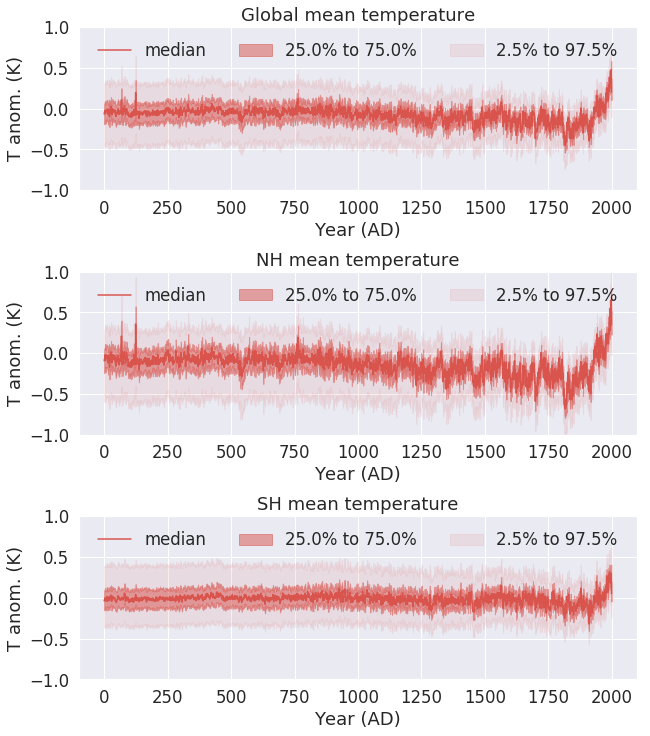

In [14]:
save_dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial'
fig = vs.plot_gmt_ts_from_jobs(save_dirpath)

## Summary

LMRt aims to provide a packaged version of the LMR framework.
It is inspired by LMR_lite.py originated by Greg Hakim (Univ. of Washington).

Pros: less code; more flexibility
+ No need to specify fixed paths or directory structures; only need to feed the correct files
+ Interactive style (Jupyter notebook, ipython shell); keep a clean experiment record when use a Jupyter notebook
+ Output whatever you want from the object ReconJob()
+ Easy for parallel computing
+ For experiments such as pseudoproxy/PSM exps., only need to replace the files to feed (as long as the files follow the pre-defined format)

Cons: still in beta
+ The current version only keeps the minimal part of code, and it can only handle priors in netCDF format with lat/lon dimensions; other priors with vertical 2-D are not supported yet
+ build_ye_files(), which is related to PSMs, is still under development